<a href="https://colab.research.google.com/github/rocket0l4/ML-files/blob/main/ada_hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [6]:
np.random.seed(42)

In [7]:
X,y = make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)

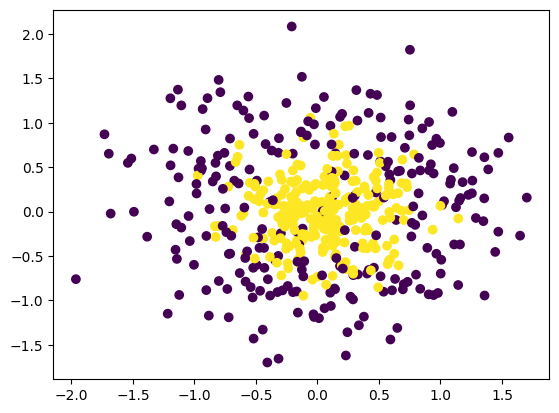

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [10]:
ada = AdaBoostClassifier()

In [11]:
np.mean(cross_val_score(ada,X,y,scoring='accuracy',cv=10))

0.812

In [12]:
ada.fit(X,y)

AdaBoostClassifier()

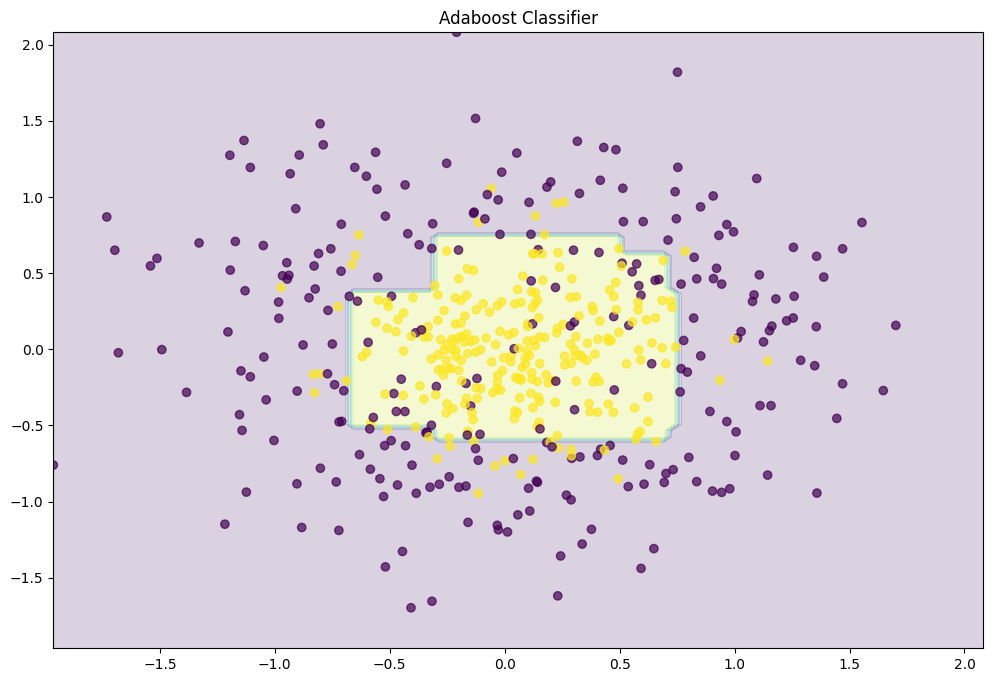

In [16]:
def plot_decision_boundary(clf):
  plt.figure(figsize=(12,8))
  x_range = np.linspace(X.min(),X.max(),100)
  xx1,xx2 = np.meshgrid(x_range,x_range)
  y_hat = clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
  y_hat = y_hat.reshape(xx1.shape)
  plt.contourf(xx1,xx2,y_hat,alpha=0.2)
  plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=0.7)
  plt.title("Adaboost Classifier")
  plt.show()

plot_decision_boundary(ada)

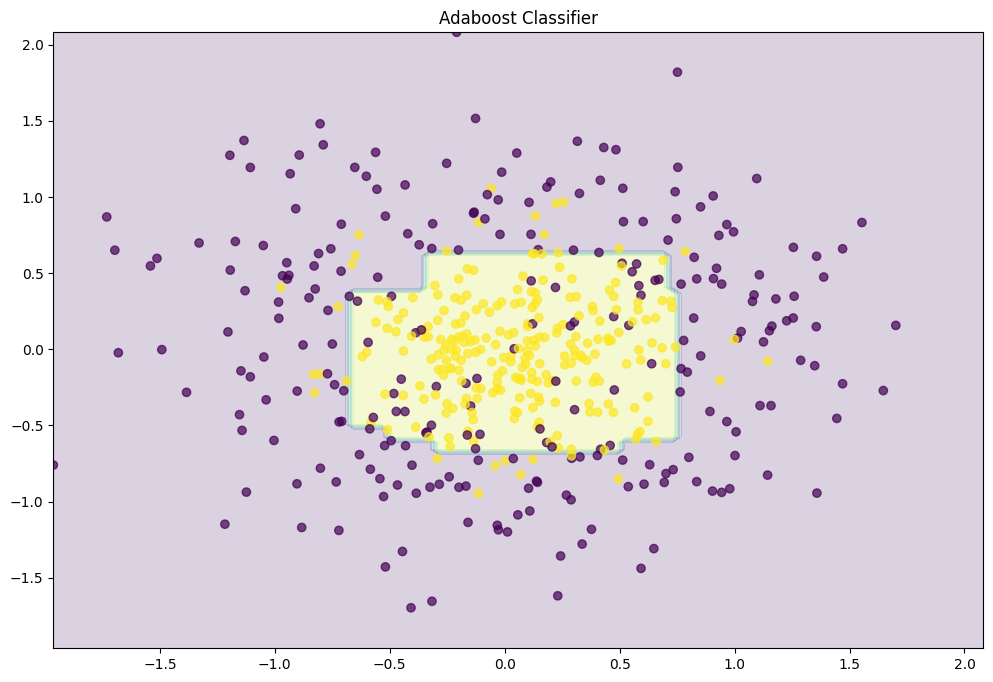

In [17]:
ada = AdaBoostClassifier(n_estimators=1500,learning_rate = 0.1)
ada.fit(X,y)
plot_decision_boundary(ada)

In [18]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10,50,100,500]
grid['learning_rate'] = [0.0001,0.001,0.01,0.1,1.0]
grid['algorithm'] = ['SAMME','SAMME.R']

grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=-1,cv=10,scoring='accuracy')

grid_result = grid_search.fit(X,y)

print("Best: %f using %s" %(grid_result.best_score_,grid_result.best_params_))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}
